# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования:**

-научиться определять рыночную стоимость объектов недвижимости.
-установить параметры, влияющие на цену объектов.
-постараться отследить аномалии и мошенническую деятельность. 
-изучить, как быстро продавались квартиры.
-посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
-вычислить среднюю стоимость кварьтр на разном удалении от центра Санкт-Петербурга
    
**План исследования:**
1. Прочитаем файл и получим общую информацию о нем.
2. Выполним предобработку:
    а) определим, в каких столбцах есть пропуски,
    б) заполним пропущенные значения там, где это возможно,  
    в) найдием столбцы, в которых нужно изменить тип данных,    
    г) преобразуем тип данных в выбранных столбцах,
    д) заменим названия в существующем столбце или создать новый с названиями без дубликатов.

3. Для решения поставленных задач необходимо рассчитать и добавить в таблицу несколько показателей:

    а) цена за 1 квадратный метр,
    б) день недели, месяц и год публикации объявления,
    в) этаж квартиры (первый, последний, другой),
    г) расстояние до центра города в километрах.
    
4. Исследовательский анализ данных:
    а) изучим перечисленные ниже параметры объектов,
    б) построим отдельные гистограммы для каждого из этих параметров,
    в) обработаем аномалии, восстановим или  удалим редкие и выбивающиеся значения,
    г) Изучим, как быстро продавались квартиры,
    д) Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта,
    е) посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений,
    ж) вычислим среднюю стоимость квартир на разном удалении от центра.
5. Выводы

### Открыть файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#посмотрим типы данных и кол-во ненулевых значений
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вывод: Мы имеем в столбцах ceiling_height, floors_total, is_apartment, living_area, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest,ponds_around3000, ponds_nearest, days_exposition пропуски. В столбцах floors_total, parks_around3000, ponds_around3000, days_exposition должны быть значения int. В столбце is_apartment должен быть тип данных bool.

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.duplicated().sum()

0

Вывод:Явных дубликатов нет.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверили количество пропусков.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

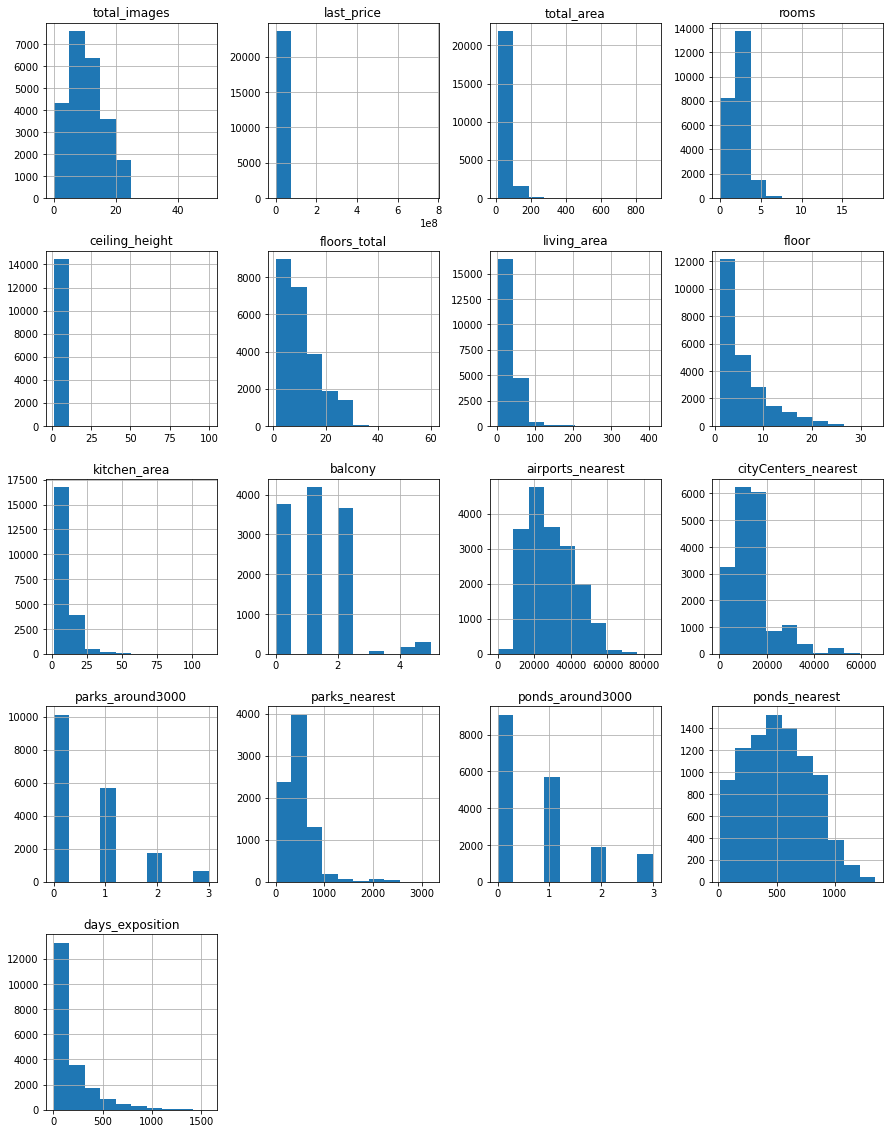

In [5]:
data.hist(figsize=(15, 20))

 Из полученных гистрограмм мы видим, что в некоторых колонках есть аномальные значения, например, стодбец ceiling_height с максимальной высотой потолка в 100 метров и колонка room с количеством ноль или 19 комнат. А также количество дней размещения объявления. Остановимся на этом позже и проанализируем.

### Выполнить предобработку данных

In [6]:
# Переименуем столбцы и проверим
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
# заменяем пропуски в столбце is_apartment на False и проверим
data['is_apartment'].fillna(False, inplace=True)

data['is_apartment'].isna().sum()

0

Вывод: Пропуски в столбце 'balcony' могут быть связаны с тем, что балкона нет. Пропуски в столбце 'is_apartment' могут быть связаны с тем, что понятие апартаменты появилось относительно недавно, поэтому раньше не заполнялся. После обработки пропусков в столбцах is_apartment и balcony нет.

In [8]:
#преобразуем столбец с датой 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [9]:
# изучим высоту потолков
data['ceiling_height'].describe()




count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [10]:
med = data['ceiling_height'].median()
print(med)
data['ceiling_height'].fillna(med)

2.65


0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

Медиана по столбцу не сильно отличается от среднего значения, поэтому заменяем пустые значения на медиану.

In [11]:
# заменим тип данных и проверим
#data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['last_price'] = data['last_price'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Заменили тип данных, чтобы производить количественные вычисления.

In [12]:
# Поищем неявные дубликаты и выведем уникальные значения locality_name
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [13]:
# приведём значения к нижнему регистру 
data['locality_name'] = data['locality_name'].str.lower()

# Выполним замену в написании 'поселок' вместо 'посёлок':
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

# Заменим похожие названия
data['locality_name'] = data.locality_name.str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data.locality_name.str.replace('городской поселок', 'поселок')

# Уникальные значения в алфавитном порядке
set(data['locality_name'].unique())

{nan,
 'бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской посёлок большая ижора',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'д

In [14]:
# Удалим строки без населенного пункта,не понятно где эти квартиры находятся, поэтому могут искажать данные.
data = data.dropna(subset=['locality_name'])
# проверим пропуски
data['locality_name'].isna().sum()

0

Вывод: Я изменили типы данных,привела имена столбцов к единому стилю,обработала явные и неявные дубликаты,также обработала пропуски.

In [15]:
data['parks_around_3000'].fillna(0)
data['ponds_around_3000'].fillna(0)

0        2.0
1        0.0
2        2.0
3        3.0
4        1.0
        ... 
23694    3.0
23695    0.0
23696    0.0
23697    3.0
23698    0.0
Name: ponds_around_3000, Length: 23650, dtype: float64

Заменили пустые значения в столбцах parks_around3000 и ponds_around3000, потому что парков и прудов может и не быть в таком радиусе, значит их ноль.

In [16]:
mean_living_for_total = ((data['living_area'] / data['total_area']).median())
data['living_area'] = data['living_area'].fillna(value=(mean_living_for_total * data['total_area']))
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,...,11.00,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,90.289724,9,False,...,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.400000,5,False,...,9.10,0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.600000,6,False,...,14.40,1,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,40.658769,22,False,...,18.90,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.430000,26,False,...,8.81,0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,6.50,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Заменила пустые значения в жилой площади, рассчитав медиану отношения жилой площади к общей всей таблицы,умножив ее на общую площадь. Так будет точнее, нежели заменить просто общей медианой.

### Добавить в таблицу новые столбцы

In [17]:
# Добавим столбец с ценой за 1м²
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,90.289724,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


In [18]:
# Добавим столбец с днем недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,90.289724,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


In [19]:
#напишем функцию категоризации по этажам
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
  
data['floor_category'] = data.apply(floor_category, axis = 1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,90.289724,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


In [20]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] // 1000)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,90.289724,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


Вывод: Добавила в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра; 
день недели публикации объявления;
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры;
расстояние до центра города в километрах.

### Провести исследовательский анализ данных

**Рассмотрим общую площадь**

In [21]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

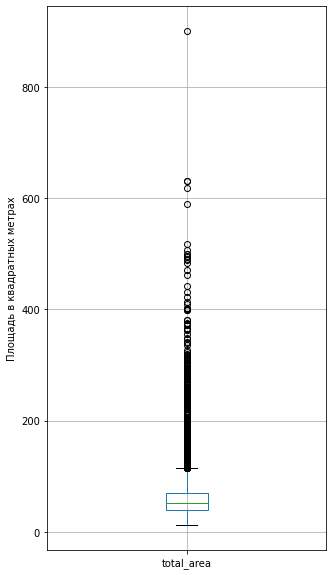

In [22]:
data.boxplot(column=['total_area'], figsize=(5,10), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

Оставляю метраж от 20м2 до 120м2, остальное выбросы.

<AxesSubplot:ylabel='Frequency'>

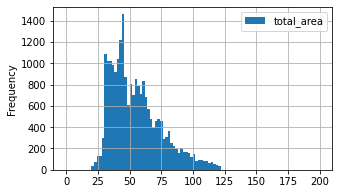

In [23]:
#построим гистограмму для общей площади без учета выбросов
data.query('total_area >= 20 & total_area <= 120').plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,200))

**Вывод**:Распределение нормальное. Наибольшее количество квартир с площадь 45м2, больше всего квартир с площадью от 30м2 до 75м2. Логично, это одно- и двухкомнатные квартиры, их общее количество наибольшее, соответственно и продаж больше. 

**Рассмотрим жилую площадь**

In [24]:
data.living_area.describe()

count    23650.000000
mean        34.566441
std         22.345625
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

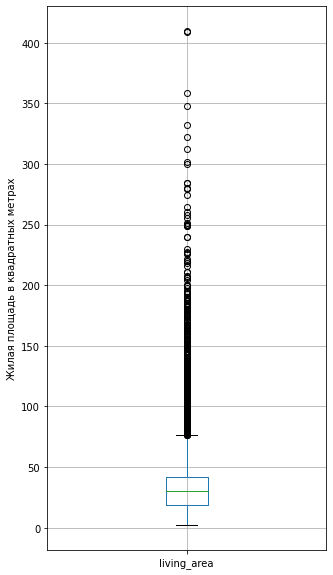

In [25]:
data.boxplot(column=['living_area'], figsize=(5,10), grid=True)
plt.ylabel('Жилая площадь в квадратных метрах')
plt.show()

оставляю площадь до 75м2, остальное выбросы

<AxesSubplot:ylabel='Frequency'>

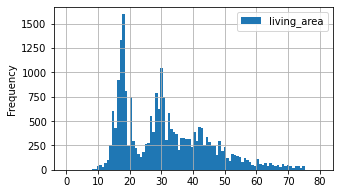

In [26]:

data.query('living_area <= 75').plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,80))

**Вывод**: Основное количество с квартир с жилой площадью от 10м2 до 60 м2, что тоже логично, это те же однушки и двушки. 

**Рассмотрим площадь кухни**

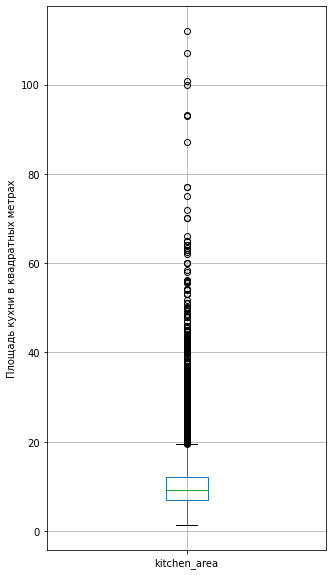

In [27]:
data.boxplot(column=['kitchen_area'], figsize=(5,10), grid=True)
plt.ylabel('Площадь кухни в квадратных метрах')
plt.show()

<AxesSubplot:ylabel='Frequency'>

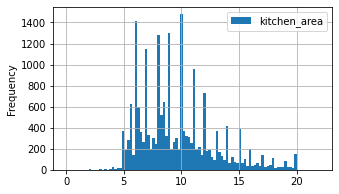

In [28]:
# Рассмотрим площадь до 20 м2, остальное выбросы
data.query('kitchen_area <= 20').plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,22))


**Вывод**:Площадь кухни в основном от 5м2 до 15м2. Кухня в 15м2 в России считается очень большой.Маленькие кухни (5м2-7м2) в старом фонде(в основном в хрущевках). Кухни больше 15м2 в элитных квартирах скорее всего.

**Рассмотрим цену объекта**

In [29]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

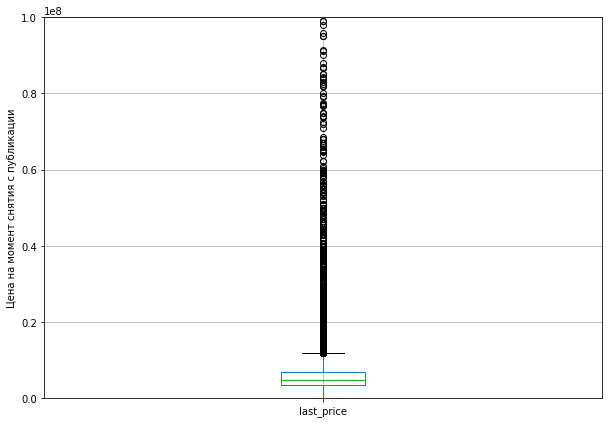

In [30]:
data.boxplot('last_price', figsize=(10,7))
plt.ylabel('Цена на момент снятия с публикации')
plt.ylim(0,100000000)
plt.show()

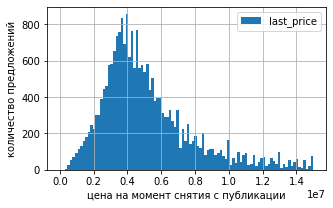

In [31]:
# ограничимся ценой до 100млн р., остальное выбросы
data.query('last_price< 100000000').plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
plt.ylabel('количество предложений')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

**Вывод**. Большинство квартир по цене около 4млн. руб, основное количество варьируется в диапазоне от 2 до 7млн.р. Цены для Санкт-Петербурга укладываются в норму. 

**Рассмотрим количество комнат**

In [32]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

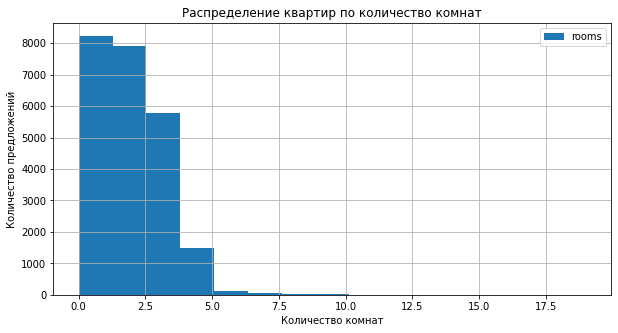

In [33]:
data.plot(kind='hist',y='rooms',title='Распределение квартир по количество комнат',grid=True, bins=15, figsize=(10,5))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

**Вывод**:Основное количество продаж приходится на 1-2х комнатные квартиры, чуть менее 3-хкомнатные, квартиры с количеством комнат 4 и более встречаются редко, это и понятно, их намного меньше от общего количества.

**Рассмотрим высоту потолков**

In [34]:
# Для значений больше 20 применим деление на 10. Скорее всего это оштбка в данных
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [35]:
data.ceiling_height.describe()

count    14490.000000
mean         2.729355
std          0.319691
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

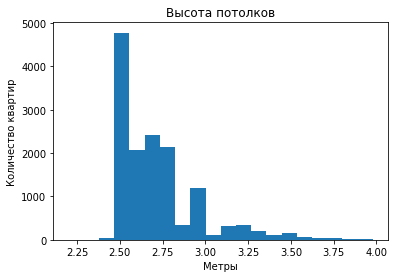

In [36]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()


**Вывод**:Высота полотков в основном 2,5-2,75м, что соответствует высоте в нашей стране. Средняя высота 2,73м, медиана 2,65м, здесь все нормально.

**Рассмотрим тип этажей**

In [37]:
data.floor_category.describe()

count      23568
unique         3
top       другой
freq       17326
Name: floor_category, dtype: object

In [38]:
# Посмотрим на кол-во в каждой категории
data['floor_category'].value_counts()

другой       17326
последний     3330
первый        2912
Name: floor_category, dtype: int64

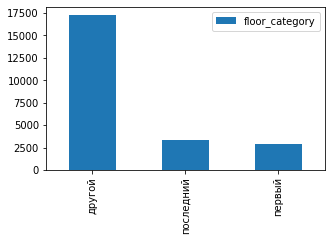

In [39]:
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), legend=True)
plt.show()

**Вывод**: Здесь тоже распределение нормальное, логично, что квартих на первых и последних этажах значительно меньше.

**Рассмотрим этажность**

In [40]:
data.floor.describe()

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

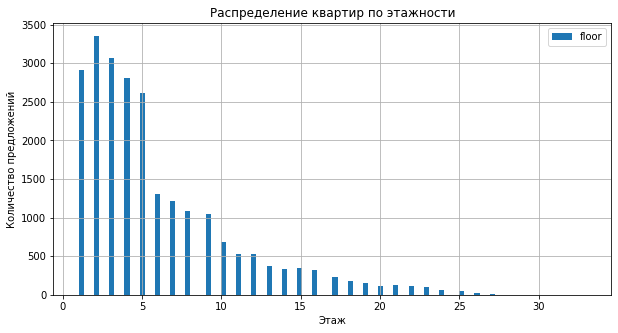

In [41]:
data.plot(kind='hist',y='floor',title='Распределение квартир по этажности',grid=True, bins=100, figsize=(10,5))
plt.xlabel('Этаж')
plt.ylabel('Количество предложений')
plt.show()


**Вывод**: Основное количество 5-этажных домов. Скорее всего старый фонд(хрущевки), в сельской местности тоже малоэтажные дома(по законодательству в сельской местности нельзя стоить высотные дома) составляют большую часть выборки.

**Рассмотрим расстояние до центра**

In [42]:
data.city_centers_nearest.describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

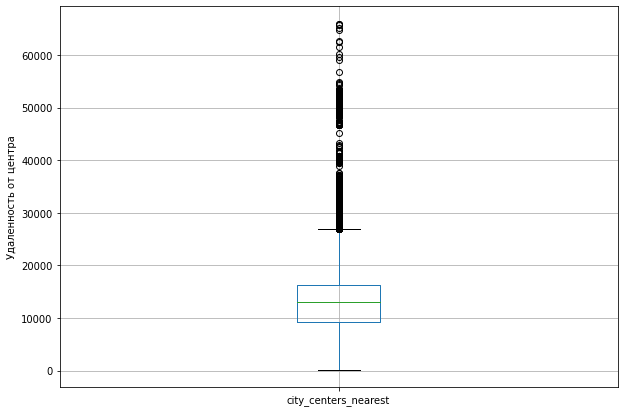

In [43]:
data.boxplot('city_centers_nearest', figsize=(10,7))
plt.ylabel('Удаленность от центра')
plt.show()

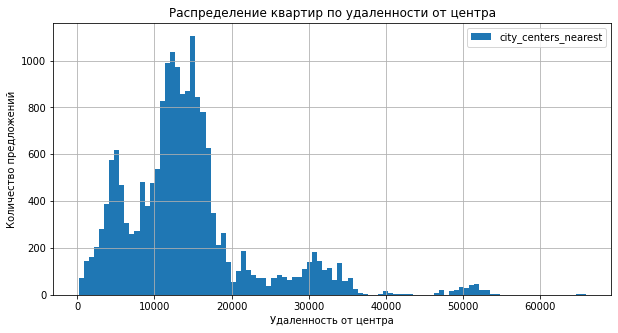

In [44]:
data.plot(kind='hist',y='city_centers_nearest',title='Распределение квартир по удаленности от центра',grid=True, bins=100, figsize=(10,5))
plt.xlabel('Удаленность от центра')
plt.ylabel('Количество предложений')
plt.show()

**Вывод**: Большинство квартир в диапазоне до 20км от центра.

**Раасмотрим расстояние до ближайшего парков**

In [45]:
data['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

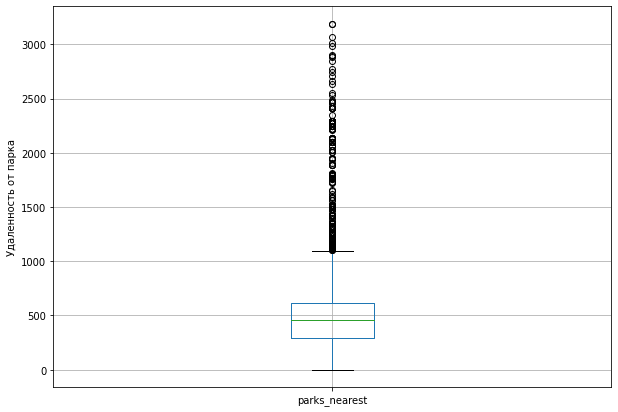

In [46]:
data.boxplot('parks_nearest', figsize=(10,7))
plt.ylabel('Удаленность от парка')
plt.show()

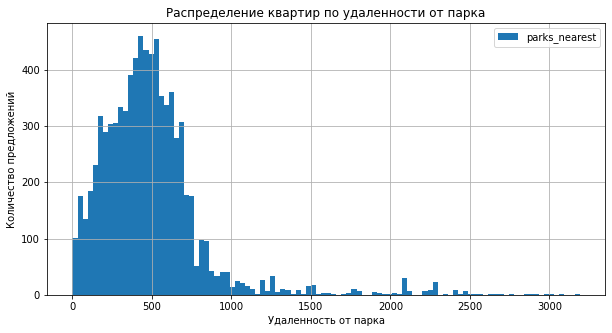

In [47]:
data.plot(kind='hist',y='parks_nearest',title='Распределение квартир по удаленности от парка',grid=True, bins=100, figsize=(10,5))
plt.xlabel('Удаленность от парка')
plt.ylabel('Количество предложений')
plt.show()

**Вывод**: Большинство домов находятся от парков на расстоянии до 1км, это хорошо, у нас в стране много парков, и большинство жителей могут посещать их.

**Изучим время продажи**

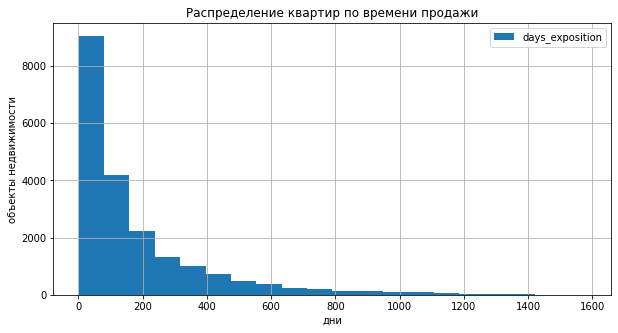

In [48]:
data.plot(kind='hist',y='days_exposition',title='Распределение квартир по времени продажи',grid=True, bins=20, figsize=(10,5))
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

In [49]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

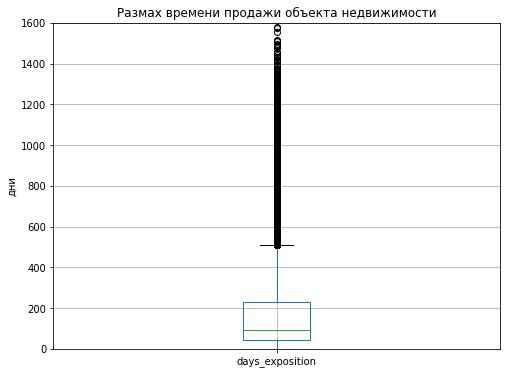

In [50]:
# диаграмма размаха
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(0, 1600)
plt.ylabel('дни')
plt.show()

Количество более 500 дней - это выбросы.

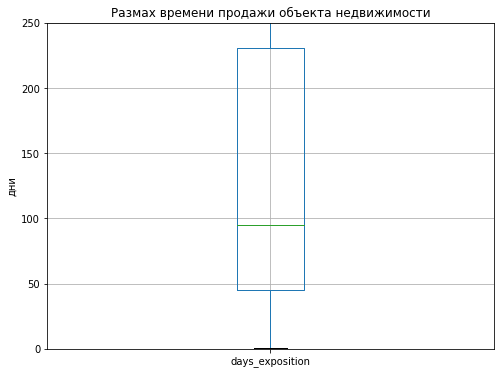

In [51]:
# для наглядности увеличим
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(0, 250)
plt.ylabel('дни')
plt.show()

<AxesSubplot:>

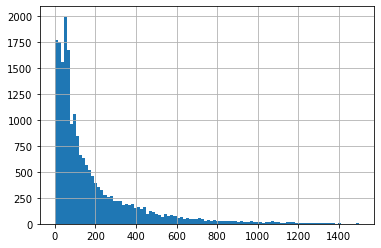

In [52]:
data['days_exposition'].hist(bins = 100, range = (0, 1500))

<AxesSubplot:>

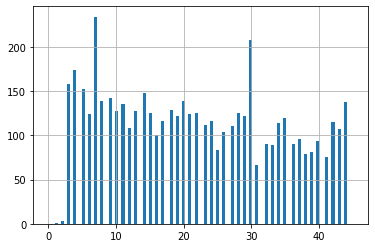

In [53]:
data['days_exposition'].hist(bins = 100, range = (0, 45))

In [54]:
print(data.query('days_exposition < 45')['days_exposition'].count())

5087


По графикам выше видно, что число быстрых продаж велико, около 20%. Мое предположение по причинам:
1. Неправильно оформлено объявление, из-за этого сняли
2. Быстро продали из-за низкой цены
3. Передумали
4. Мошенничество(система определяет такие объявления и блокирует. Например, по жалобам клиентов, по дополнительным проверкам системы, возможно несуществующие квартиры)

<AxesSubplot:>

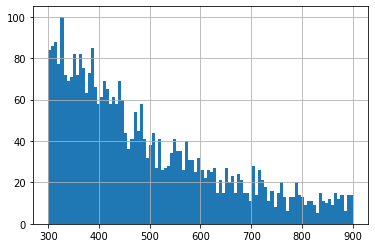

In [55]:
data['days_exposition'].hist(bins = 100, range = (300, 900))


In [56]:
print(data.query('days_exposition > 230')['days_exposition'].count())

5135


Долгие продажи тоже составляют около 20%. Возможные причины:
1. Завышена цена
2. Несогласованная перепланировка
3. Неудовлетворительное состояние жилья
4. Забыли снять объявление после продажи.

In [57]:
print(data['days_exposition'].median())
print(data['days_exposition'].mean())

95.0
180.7531998045921


<div class="alert alert-info">**Вывод**: Среднее количество дней- 156, медианное -73. Пики снятия 45 ,60 и 90 дней. Это может быть связано со сроком размещения объявлений(возможно нужно продлевать каждые 15 или 30 дней). Нормальное время продажи от 45 до 230 дней. До 45 дней -это быстрые продажи. Возможные причины: 1. Неправильно оформлено объявление, из-за этого сняли 2. Быстро продали из-за низкой цены 3. Передумали 4. Мошенничество . Более 230 дней это долгие продажи. Возможные причины:1. Завышена цена
2. Несогласованная перепланировка
3. Неудовлетворительное состояние жилья
4. Забыли снять объявление после продажи. 
Продажи более 500 дней можно считать выбросами.</div>

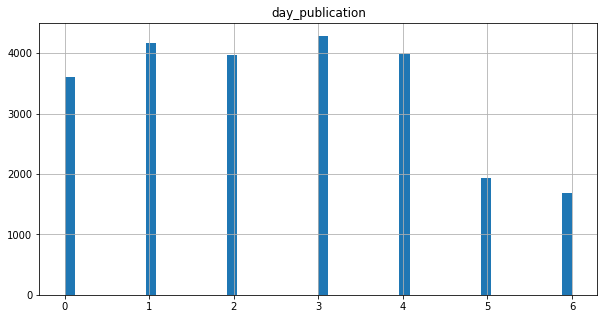

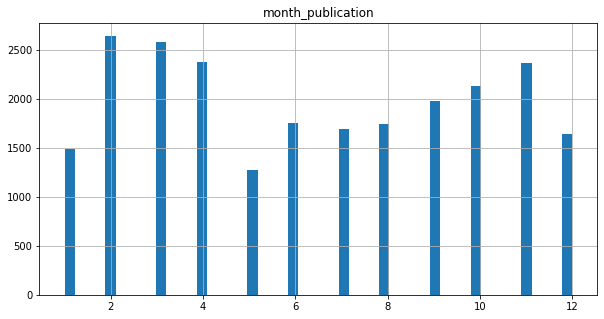

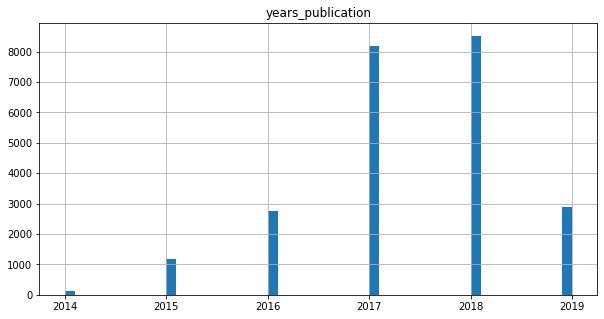

In [58]:
# День недели
data['day_publication'] = data['first_day_exposition'].dt.weekday
# Месяц
data['month_publication'] = data['first_day_exposition'].dt.month
# Год
data['years_publication'] = data['first_day_exposition'].dt.year
data.head()
data.hist('day_publication', bins=50, figsize=(10,5));
data.hist('month_publication', bins=50, figsize=(10,5))
data.hist('years_publication', bins=50, figsize=(10,5));

**Вывод**: Зависимость от дня недели нет, кроме выходных - в эти дни продаж меньше. Весной и осенью объявлений больше, летом меньше, видимо связано с отпусками. В 2014году меньше всего продаж, возможно связано с кризисом в этом году и высокой ценой. 

**Факторы, влияющие на стоимость**

In [59]:
data.corr()['last_price']

total_images               0.104558
last_price                 1.000000
total_area                 0.653743
rooms                      0.363421
ceiling_height             0.347695
floors_total              -0.006745
living_area                0.585768
floor                      0.026770
is_apartment               0.026964
studio                    -0.025363
open_plan                 -0.008802
kitchen_area               0.520233
balcony                    0.008526
airports_nearest          -0.026366
city_centers_nearest      -0.206887
parks_around_3000          0.150886
parks_nearest             -0.016310
ponds_around_3000          0.160243
ponds_nearest             -0.085193
days_exposition            0.080937
price_per_square_meter     0.736562
exposition_weekday         0.001607
exposition_month           0.002741
exposition_year           -0.042927
city_centers_nearest_km   -0.206954
day_publication            0.001607
month_publication          0.002741
years_publication         -0

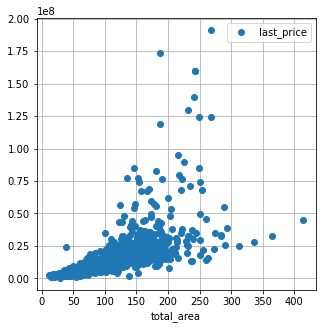

In [60]:
(
    data.query('living_area<150').pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

Зависимость цены от площади есть, чем больше метраж, тем больше стоимость.

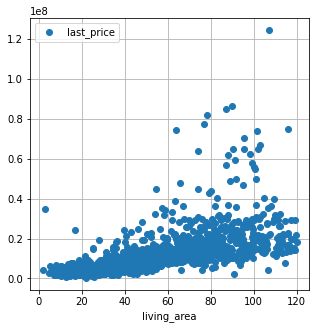

In [61]:
(
    data.query('living_area<120').pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()


Зависимость цены от жилой площади также есть, чем больше метраж, тем больше стоимость.

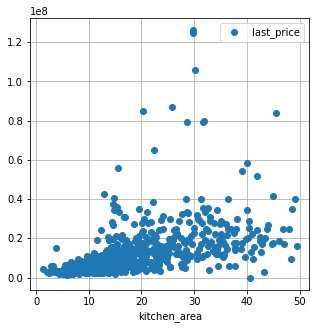

In [62]:
(
    data.query('kitchen_area<50').pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

Зависимость также наблюдается, корреляция 0,52.

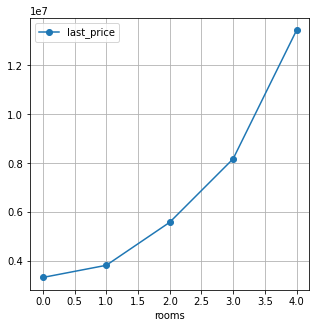

In [63]:
(
    data.query('rooms < 5').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Зависимость от количества комнат тоже очевидна, чем больше комнат, тем выше стоимость.

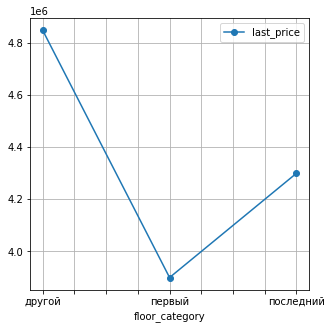

In [64]:

(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Самая низкая цена у квартир на первом этаже. Многие отказываются покупать квартиры на первом этаже. 

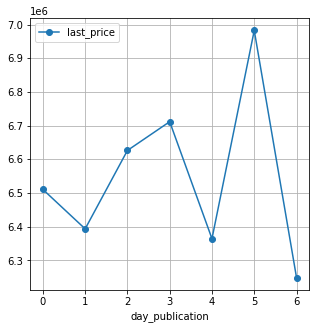

In [65]:

(
    data.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Самая низкая цена в субботу, самая высокая в пятницу.

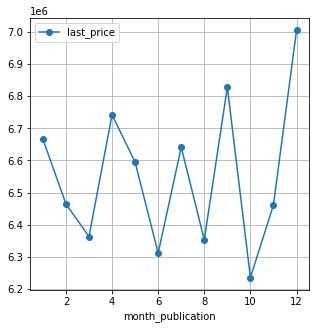

In [66]:
(
    data.pivot_table(index='month_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Самая низкая цена в ноябре. Самая высокая- в декабре.Опять снижение цены летом(как и с количеством предложений).В сентябре после отпусков цена сильно возрастает.

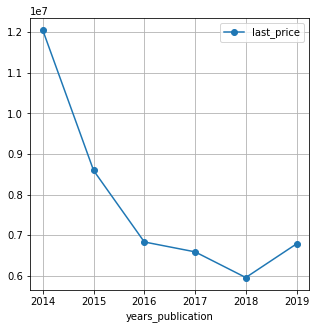

In [67]:
(
    data.pivot_table(index='years_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

С 2014 года цена падала, возможно это связано с кризисом 2014года, удорожанием кредитов, цены приходилось снижать.

**Средняя цена**

In [68]:
localities_10 = data['locality_name'].value_counts().head(10)

In [69]:
localities_10_pivot = data.query('locality_name in @localities_10.index').pivot_table(index='locality_name', values='price_per_square_meter')
df1 = localities_10_pivot.sort_values(by='price_per_square_meter', ascending=False)

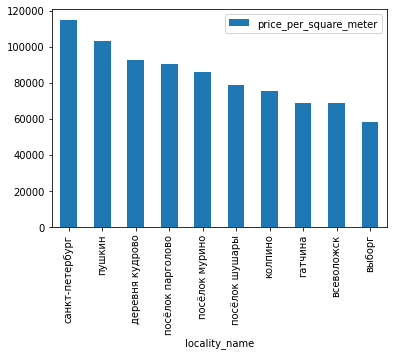

In [70]:
(
    df1.plot(kind= 'bar')
)
plt.show()

**Вывод**: Самая высокая стоимость в Санкт-Петербурге(это логично). В десятке самая ниизкая в Выборге(он находится достаточно далеко от СПБ-120км). Пушкин от Питера находится в 24км, поэтому и высокая цена.

**Вычислим среднюю стоимость на разном удалении от центра.**

<AxesSubplot:xlabel='city_centers_nearest_km'>

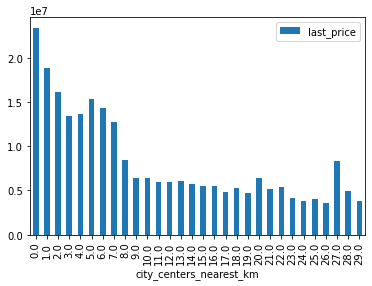

In [71]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
)

**Вывод**:Наблюдается зависимость цены квадратного метра от отдаленности от центра Санкт-Петербурга, чем ближе к центру, тем дороже. Скачок на 27км возможно связан с элитным районом. А падение на 3 и 4км- со старым фондом.

**ОБЩИЙ ВЫВОД**

Мы обработали полученныу данные:
- обработали пропущенные значения там, где это необходимо,
- заменили типы данных на необходимые для удобной работы. 
- Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. 
Добавили в таблицу следующие столбцы:
- цена одного квадратного метра ;
- день недели публикации объявления ;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.
Изучили следующие параметры на наличие выбросов:
- площадь, жилая площадь, площадь кухни,цена, число комнат, высота потолков. Постороили гистограммы без учета выбросов.
- время продажи квартир. Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 600 дней. Нормальное время продаж до 200 дней, долгие продажи могут быть связаны с завышенной ценой квартиры или с неснятием в срок объявления.
Постороили гистограммы без учета выбросов.

Мы выявили, что чаще всего продаются 1-2комнатные квартиры площадью до 75м2 до 20км от центра города. Медианная высота потолков 2,65м, чаще объявления подают в будние дни,весной и осенью. Больше домов до 5 этажей.  

Стоимость квадратного метра в топ-10 населённых пунктов

- Дороже всего квадратный метр в Санкт-Петербурге - 114849
- Дешевле всего квадратный метр в Выборге - 58141(из-за удаленности от города)
<div class="alert alert-info">
Мы определили, что количество быстрых продаж(до 45 дней) около 20%, возможные причины:
- 1. Неправильно оформлено объявление, из-за этого сняли 2. Быстро продали из-за низкой цены 3. Передумали 4. Мошенничество(система определяет такие объявления и блокирует. Например, по жалобам клиентов, по дополнительным проверкам системы, возможно несуществующие квартиры)
Также мы определили количество долгих продаж(более 230дней)также около 20%, возможные причины:
- 1. Завышена цена 2. Несогласованная перепланировка 3. Неудовлетворительное состояние жилья 4. Забыли снять объявление после продажи.</div>

Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют общая площадь, этаж квартиры, близость к центру. Незначительно на стоимость влияют день, сезонность, год размещения. Самая высокая стоимость м2 в центре Санкт-Петербурга(8км).